## Projeto 2

Para o Projeto 2 o objetivo é responder 10 perguntas de negócio a partir de um dataset sobre uma rede de varejo que comercializa diversos produtos em diversas cidades dos EUA.

Os dados são reais e foram extraídos do link:

https://community.tableau.com/s/question/0D54T00000CWeX8SAL/sample-superstore-sales-excelxlsFizemos


### Pacotes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

### Leitura dos dados

In [2]:
df_dados = pd.read_csv('C:/Users/prisc/Downloads/dataset.csv')

### Analise exploratória dos dados

In [3]:
# Nome das colunas
print(df_dados.columns)

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')


In [4]:
# Verificar o tipo de dado de cada coluna
df_dados.dtypes

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

In [5]:
df_dados.head(3)

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.96
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.94
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.62


In [6]:
print("Formato dados:", df_dados.shape)

Formato dados: (9700, 11)


In [7]:
# Convertendo a coluna 'data_objeto' para o tipo de data dd/mm/yyyy
df_dados['Data_Pedido'] = pd.to_datetime(df_dados['Data_Pedido'], format='%d/%m/%Y')

df_dados.dtypes

ID_Pedido               object
Data_Pedido     datetime64[ns]
ID_Cliente              object
Segmento                object
Pais                    object
Cidade                  object
Estado                  object
ID_Produto              object
Categoria               object
SubCategoria            object
Valor_Venda            float64
dtype: object

In [8]:
print(df_dados['Data_Pedido'][0])

2017-11-08 00:00:00


In [9]:
# Verificando se há registros duplicados
df_dados[df_dados.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [10]:
# Verificando de há valores ausentes
df_dados.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

In [13]:
# Amostra da tabela
df_dados.sample(3)

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
8486,CA-2017-158841,2017-02-02,SE-20110,Consumer,United States,Arlington,Virginia,OFF-BI-10002557,Office Supplies,Binders,36.40
3057,CA-2018-131492,2018-10-19,HH-15010,Corporate,United States,San Francisco,California,OFF-LA-10001641,Office Supplies,Labels,31.50
6852,US-2018-162670,2018-12-23,MF-18250,Corporate,United States,Little Rock,Arkansas,OFF-PA-10001994,Office Supplies,Paper,44.96


### Perguntas de negócio:

1) Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?

In [14]:
# Ordenando os dados de Office Supplies por maior valor de venda
df_dados[df_dados['Categoria'] == 'Office Supplies'] \
        .sort_values(by='Valor_Venda', ascending=False)\
        [['Pais', 'Cidade','Estado', 'Valor_Venda']].head()

,Pais,Cidade,Estado,Valor_Venda
9036,United States,Detroit,Michigan,9892.74
4095,United States,Minneapolis,Minnesota,9449.95
2505,United States,San Francisco,California,8187.65
509,United States,Atlanta,Georgia,6354.95
6517,United States,Jackson,Michigan,5443.96


A Cidade com maior valor de venda para a categoria 'Office Supplies' é a cidade de Michigan com valor de venda de 9892,74.

Cidade com maior Total de vendas:

In [16]:
df_dados[df_dados['Categoria'] == 'Office Supplies']\
    .groupby("Cidade")['Valor_Venda'].sum().sort_values(ascending=False).head()

Cidade
New York City    68362.814
Los Angeles      47098.100
San Francisco    41771.198
Seattle          34856.878
Philadelphia     29313.687
Name: Valor_Venda, dtype: float64

A cidade com maior total de vendas para a categoria 'Office Supplies' é New York City, com total de 68362,814.

2) Qual o Total de Vendas Por Data do Pedido? Demonstre o resultado através de um gráfico.

In [17]:
total_venda_por_data = df_dados.groupby('Data_Pedido')['Valor_Venda'].sum()

total_venda_por_data.to_frame().sort_values(by='Valor_Venda')

,Valor_Venda
Data_Pedido,
2016-07-19,2.025
2018-07-12,3.816
2015-01-28,3.928
2015-06-24,4.272
2015-10-01,4.710
...,...
2015-09-08,14228.428
2018-03-23,14816.068
2018-10-22,15158.877


In [ ]:
plt.figure(figsize=(10, 5))  

total_venda_por_data.plot(x = 'Data_Pedido', y = 'Valor_Venda')

# Rotacionar eixo
plt.xticks(rotation=45)

# Adicionar rótulos e título
plt.xlabel('Data do Pedido')
plt.ylabel('Total de Venda')
plt.title('Valor Total de Vendas por Data de Pedido')


plt.show();


3) Qual o Total de Vendas por Estado? Demonstre o resultado através de um gráfico de barras.

In [19]:
total_estado = df_dados.groupby('Estado')['Valor_Venda'].sum().reset_index()
total_estado.head()

,Estado,Valor_Venda
0,Alabama,19510.6400
1,Arizona,35272.6570
2,Arkansas,11673.8300
3,California,442927.0975
4,Colorado,31841.5980


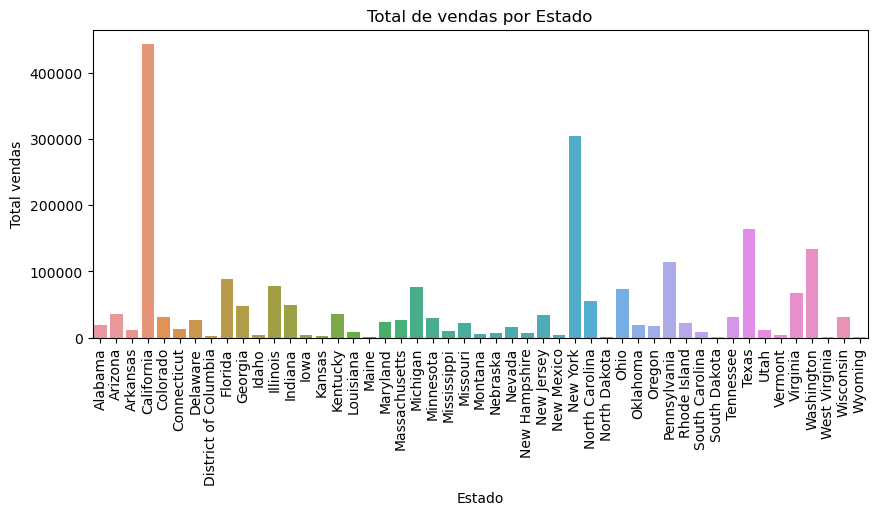

In [28]:
plt.figure(figsize = (10, 4))
sns.barplot(data = total_estado, 
            y = 'Valor_Venda', 
            x = 'Estado')
plt.title("Total de vendas por Estado")
plt.ylabel("Total vendas")
plt.xticks(rotation = 90)
plt.show()

4. Quais São as 10 Cidades com Maior Total de Vendas?Demonstre o resultado através de um gráfico de barras.

In [90]:
total_cidade = df_dados.groupby('Cidade')['Valor_Venda'].sum()\
    .reset_index()

top_10_vendas = total_cidade.nlargest(10, 'Valor_Venda')
top_10_vendas["Posicao"] = range(1,11)
print("As 10 cidades com maior total de vendas são:")

# Realocando as colunas
top_10_vendas.iloc[:,[2,0,1]].reset_index(drop=True)

As 10 cidades com maior total de vendas são:


,Posicao,Cidade,Valor_Venda
0,1,New York City,251749.2190
1,2,Los Angeles,171654.6330
2,3,Seattle,114725.4780
3,4,San Francisco,107489.9520
4,5,Philadelphia,107197.8030
5,6,Houston,61590.1868
6,7,San Diego,47458.3790
7,8,Chicago,46974.3430
8,9,Jacksonville,44713.1830
9,10,Detroit,42446.9440


In [ ]:
plt.figure(figsize = (10, 4))
sns.set_palette("viridis", 14)
sns.barplot(data = top_10_vendas, 
            y = 'Valor_Venda', 
            x = 'Cidade')
plt.title("Os 10 Estados com mais vendas")
plt.ylabel("Total vendas")
plt.xticks(rotation = 30)
plt.show()

5. Qual Segmento Teve o Maior Total de Vendas?Demonstre o resultado através de um gráfico de pizza

In [69]:
total_segmento = df_dados.groupby('Segmento')['Valor_Venda'].sum().reset_index()

total_segmento


,Segmento,Valor_Venda
0,Consumer,1.133834e+06
1,Corporate,6.792322e+05
2,Home Office,4.224914e+05


In [ ]:
# Grafico de pizza
plt.figure(figsize=(10, 6))
plt.pie(total_segmento['Valor_Venda'],labels = total_segmento['Segmento'] , autopct='%1.1f%%');
plt.title('Vendas por Segmento')
plt.show()

In [ ]:
# Grafico de pizza aberto

plt.figure(figsize=(10, 6))
plt.pie(total_segmento['Valor_Venda'],
         labels = total_segmento['Segmento'], autopct='%1.1f%%', startangle=90,
         colors=['#ff9999','#66b3ff','#99ff99'])

# Limpar o circulo central
centro_circ = plt.Circle((0,0),0.75,fc='white')
plt.gcf().gca().add_artist(centro_circ)

plt.title('Porcentagem de Vendas por Segmento')

plt.show()

6. Qual o Total de Vendas Por Segmento e Por Ano?


In [26]:
# Criando a variavel ano
df_dados["Ano"] = df_dados["Data_Pedido"].dt.year

# Agrupar por segmento e ano
df_dados.groupby(['Segmento','Ano'])['Valor_Venda'].sum()

Segmento     Ano 
Consumer     2015    256719.9166
             2016    265295.2593
             2017    288459.5572
             2018    323359.6019
Corporate    2015    125819.5957
             2016    114643.1229
             2017    203266.7398
             2018    235502.7284
Home Office  2015     88229.0878
             2016     74134.1332
             2017    103639.6270
             2018    156488.5849
Name: Valor_Venda, dtype: float64

In [27]:
# Agrupar por Ano e segmento
df_dados.groupby(['Ano','Segmento'])['Valor_Venda'].sum()

Ano   Segmento   
2015  Consumer       256719.9166
      Corporate      125819.5957
      Home Office     88229.0878
2016  Consumer       265295.2593
      Corporate      114643.1229
      Home Office     74134.1332
2017  Consumer       288459.5572
      Corporate      203266.7398
      Home Office    103639.6270
2018  Consumer       323359.6019
      Corporate      235502.7284
      Home Office    156488.5849
Name: Valor_Venda, dtype: float64

7. Os  gestores  da  empresa  estão  considerando conceder  diferentes  faixas  de  descontos  e gostariam de fazer uma simulação com base na regra abaixo:
- Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
- Se o Valor_Venda for menor que 1000 recebe 10% de desconto.

- Quantas Vendas Receberiam 15% de Desconto?

In [92]:
# Soma o total de ocorrencias com valor de venda maior que 1000
n_vendas = (df_dados["Valor_Venda"] > 1000).sum()

print(n_vendas, "vendas receberiam 15% de desconto.")

457 vendas receberiam 15% de desconto.


In [94]:
# Outra forma de fazer
# Cria uma coluna com uma condicional, se o valor da venda for maior que 1000, o desconto é de 15%, senão 10%
df_dados["Desconto"] = np.where(df_dados["Valor_Venda"] > 1000, 0.15, 0.10)

# Total em cada desconto
df_dados['Desconto'].value_counts()

0.10    9243
0.15     457
Name: Desconto, dtype: int64

8. Considere  Que  a  Empresa  Decida  Conceder  o  Desconto  de  15%  do  Item  Anterior.  Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?

In [95]:
media_antes = df_dados["Valor_Venda"].mean()

valor_venda_desconto= [v*0.85 if v > 1000 else v for v in df_dados["Valor_Venda"]]

media_depois = np.array(valor_venda_desconto).mean()

print("A Média do valor de vendas antes do desconto é de:", round(media_antes))
print("A Média do valor de vendas depois do desconto é de:", round(media_depois))

A Média do valor de vendas antes do desconto é de: 230
A Média do valor de vendas depois do desconto é de: 216


9. Qual o Média de Vendas Por Segmento, Por Ano e Por Mês?Demonstre o resultado através de gráfico de linha.

In [96]:
df_dados.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda',
       'Ano', 'Desconto'],
      dtype='object')

In [97]:
# Criando a coluna "mes"
df_dados["Mes"] = df_dados["Data_Pedido"].dt.month

media_venda = df_dados.groupby(['Segmento','Ano','Mes'])['Valor_Venda'].mean().reset_index()

media_venda

,Segmento,Ano,Mes,Valor_Venda
0,Consumer,2015,1,146.736787
1,Consumer,2015,2,117.327926
2,Consumer,2015,3,152.170564
3,Consumer,2015,4,189.762750
4,Consumer,2015,5,191.337439
...,...,...,...,...
139,Home Office,2018,8,176.160606
140,Home Office,2018,9,249.140597
141,Home Office,2018,10,412.576597
142,Home Office,2018,11,247.519423


In [ ]:
# sns.lineplot(data = df_dados, x = "Mes", y = 'Valor_Venda',
#             hue = "Segmento", style="Segmento", ci=None);

g = sns.FacetGrid(df_dados, col='Ano', col_wrap=2, height=4, aspect=1)

# Mudar cores das linhas    
g.map(sns.lineplot,"Mes", 'Valor_Venda',  "Segmento",  ci=None ).add_legend()

plt.show()

10. Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias? Demonstre tudo através de um único gráfico

In [105]:
top_categorias = df_dados.groupby(['Categoria','SubCategoria'])['Valor_Venda'].\
    sum().rename('Total_Venda').reset_index().\
        nlargest(12, 'Total_Venda').sort_values(by = ['Categoria','Total_Venda'], ascending = False)

top_categorias

,Categoria,SubCategoria,Total_Venda
16,Technology,Phones,325271.2940
15,Technology,Machines,189238.6310
13,Technology,Accessories,162791.3620
14,Technology,Copiers,146248.0940
11,Office Supplies,Storage,216188.3620
6,Office Supplies,Binders,194723.3810
4,Office Supplies,Appliances,104061.6930
10,Office Supplies,Paper,76312.7640
1,Furniture,Chairs,317919.6250
3,Furniture,Tables,202083.3600


In [ ]:
# Grafico de barras para mostrar as 12 subcategorias com mais vendas separadas por categoria
plt.figure(figsize=(12, 6))
sns.set_palette("bright")
sns.barplot(data=top_categorias, x='Total_Venda', y='SubCategoria', hue='Categoria')
plt.title("Top 12 Subcategorias com mais vendas")
plt.ylabel("Sub Categoria")
plt.xlabel("Total Vendas")

plt.show()